In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv(r"C:\Users\gdevi\Desktop\final_dataset.csv",sep=",",encoding='latin-1')


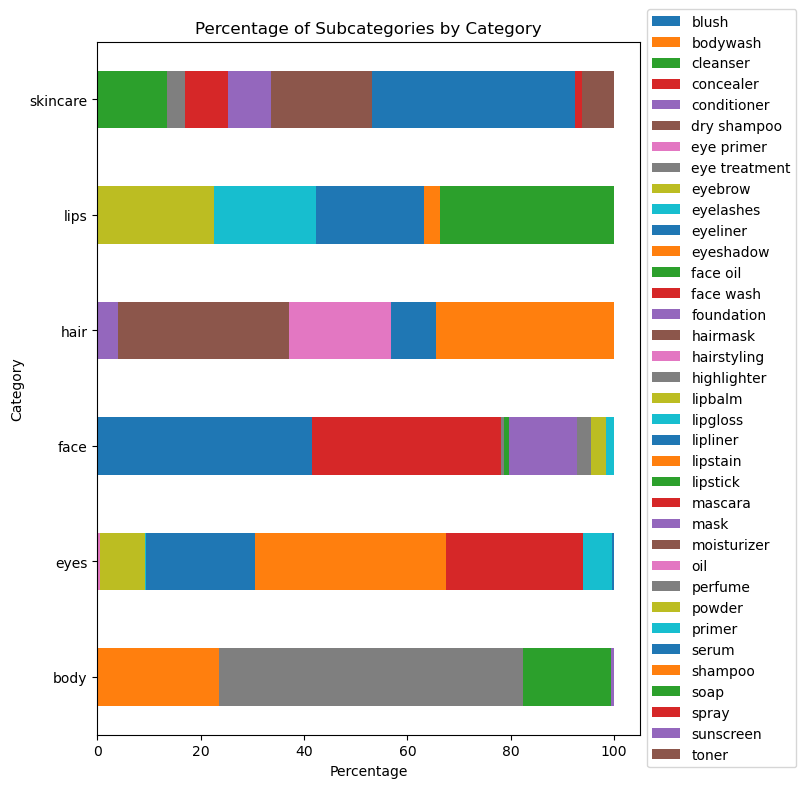

In [6]:
# group by category and subcategory and count the number of products in each subcategory
df_grouped = df.groupby(['category', 'subcategory']).size().reset_index(name='counts')

# group by category and count the total number of products in each category
df_category = df.groupby('category').size().reset_index(name='total_counts')

# merge the two dataframes to calculate the percentage of subcategories in each category
df_merged = pd.merge(df_grouped, df_category, on='category')
df_merged['percentage'] = (df_merged['counts'] / df_merged['total_counts']) * 100

# pivot the dataframe to create a multi-level index
df_pivot = df_merged.pivot(index='category', columns='subcategory', values='percentage')

# plot a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(7,9))
df_pivot.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Percentage')
ax.set_ylabel('Category')
ax.set_title('Percentage of Subcategories by Category')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# display the plot
plt.show()

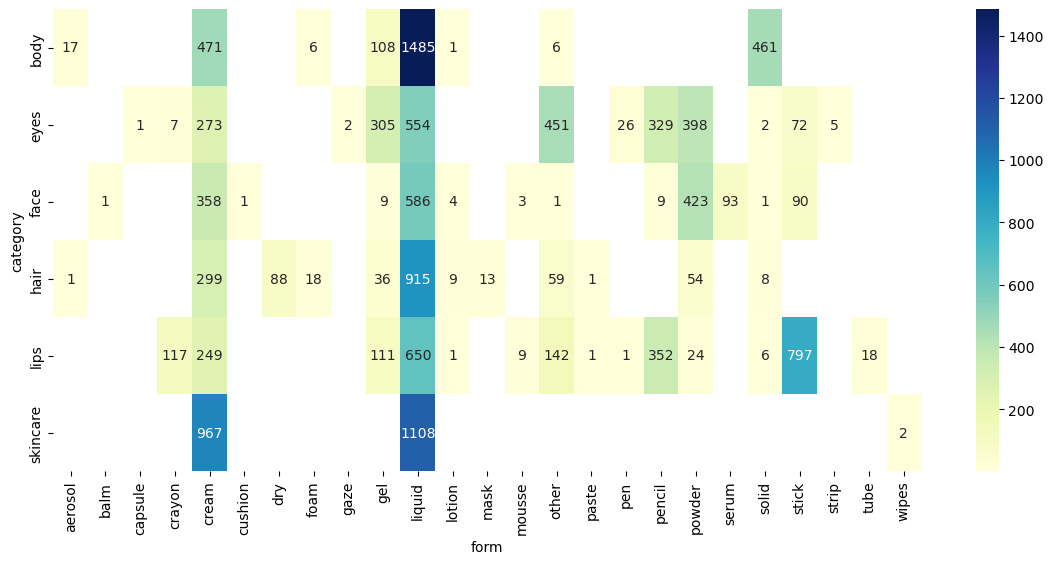

In [3]:
# create a pivot table to count the number of products in each category-form combination

pivot_table = pd.pivot_table(df, index='category', columns='form', values='subcategory', aggfunc='count')

# plot the heatmap
#ax =sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g') 

# Set the figure size
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the heatmap on the adjusted figure size
ax = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', ax=ax)

# Show the plot
plt.show()